# Prova 3
**Nome:** Maria Rafaela Soares

# Questão 2:

Utilizando um conjunto de dados que não tenhamos abordado durante as aulas e utilizando Python ou R, construa um gráfico que atenda os pilares da visualização de dados e explique porque ele os atende.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

## Dados utilizados

### PIB por Unidade da Federação, 2019
#### Fonte: 
``https://www.ibge.gov.br/estatisticas/economicas/contas-nacionais/9088-produto-interno-bruto-dos-municipios.html?=&t=destaques&utm_source=landing&utm_medium=explica&utm_campaign=pib``

### Carregando dados

In [2]:
pib = pd.read_csv('20220209102125.csv', sep=';', header=1)
pib

,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
0,15630017,58963729,17496661,108181091,293240504,163575327,273613711,137345595,208672492,97339938,...,52780785,71336780,482464177,779927917,47091336,14292227,323263857,44689483,2348338000,39355941


In [3]:
pib = pib.stack().reset_index().rename(
    columns={'level_1':'unidade_federacao', 0:'pib'})[['unidade_federacao','pib']]

### Plotando gráfico

Text(0.5, 0.98, 'PIB por Unidade da Federação\n Brasil - 2019')

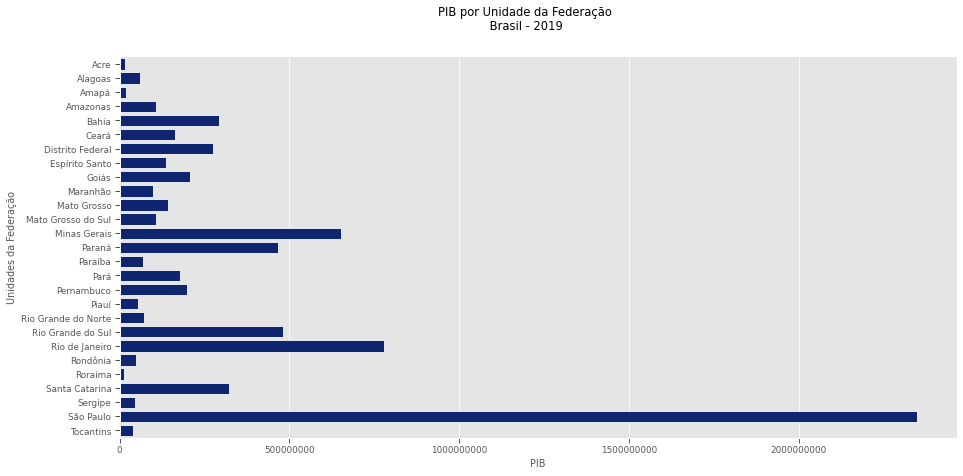

In [4]:
sns.set_context('paper')

f, ax = plt.subplots(figsize = (15,7))

sns.set_color_codes('dark')
cg = sns.barplot(x = 'pib', y = 'unidade_federacao', data = pib,
            label = 'PIB Unidades da Federação - 2019', color = 'b', edgecolor = 'w')
sns.despine(left = True, bottom = True)
plt.ticklabel_format(style='plain', axis='x')
sns.despine()
plt.ylabel('Unidades da Federação')
plt.xlabel('PIB')
plt.suptitle('PIB por Unidade da Federação\n Brasil - 2019')

**Por fim, o gráfico apresentado atende os pilares da visualização de dados por:**

1. Transmite com clareza a informação;
2. É preciso. Objetiva-se a transmitir para o receptor o valor do PIB brasileiro por unidade da federação e atende bem essa função, com clareza e sem induzir o leitor ao erro;
3. É efeitivo, pois transmite a mensagem a qual se objetiva.

# Questão 3:
Considerando o conjunto de dados, em anexo, relacionado à medição da largura e do comprimento da pétala e da sépala de uma amostra de flores íris, construa um gráfico boxplot para a largura da pétala separando os grupos pelas espécies de íris.

In [5]:
iris = pd.read_csv('IRIS.csv')
iris.head()

,Comprimento_Sepala,Largura_Sepala,Comprimento_Petala,Lagura_Petala,Especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Text(0, 0.5, 'Lagura da Petala')

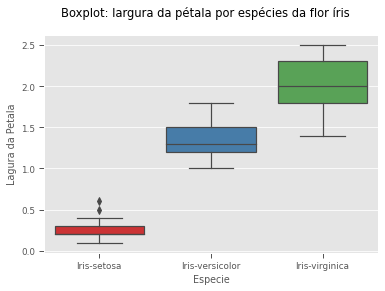

In [6]:
sns.set_context('paper')
sns.set_color_codes('dark')
sns.boxplot(x = 'Especie', y = 'Lagura_Petala', data = iris, palette='Set1')
plt.suptitle('Boxplot: largura da pétala por espécies da flor íris')
plt.ylabel('Lagura da Petala')

# Questão 4:

Aplicando um teste de hipóteses para a média da variável da questão anterior e considerando as possíveis combinações entre as espécies de íris, apresente o resultado obtido e, a partir dele, discuta quais espécies podem ser consideradas como tendo características estatisticamente distintas para a variável em análise. Considere um grau de confiança de 95%.

Text(0.5, 0, 'Lagura da Petala')

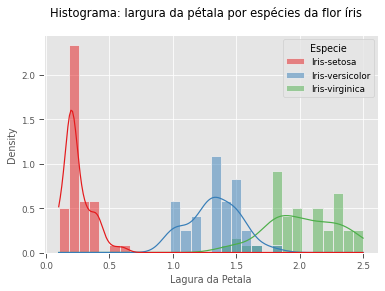

In [7]:
sns.set_context('paper')
sns.histplot(hue = 'Especie', x = 'Lagura_Petala',
             stat = 'density', data = iris,
             kde = True, bins=30, palette='Set1')
plt.suptitle('Histograma: largura da pétala por espécies da flor íris')
plt.xlabel('Lagura da Petala')

No gráfico acima, foi possível observar a distribuição de probabilidade associada a largura da petala cada espécie da flor íris. Com o auxílio visual do boxplot é possível notar, reforçadamente, o comportamento diferente para cada espécies no que tange a largura das petalas, deixando forte evidencia de distribuição distinta entre as espécies. 

## Aplicando o teste de hipóteses:

**Grupos são estatisticamente diferentes?**

**H0:** distribuições possuem a mesma distribuição de probabilidade;

**H1:** distribuições não possuem a mesma distribuição de probabilidade

In [8]:
from scipy import stats

In [9]:
iris.Especie.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
# 'Iris-setosa' vs 'Iris-versicolor'
t_value, p_value = stats.ttest_ind(iris[iris['Especie']=='Iris-setosa']
                                   ['Lagura_Petala'], iris[iris['Especie']=='Iris-versicolor']
                                   ['Lagura_Petala'])
print('_'*70)
print('Iris-setosa vs Iris-versicolor:')
print('t_value:',t_value)
print('p_value:',p_value)
print('_'*70)

# 'Iris-setosa' vs 'Iris-virginica'
t_value2, p_value2 = stats.ttest_ind(iris[iris['Especie']=='Iris-setosa']
                                   ['Lagura_Petala'], iris[iris['Especie']=='Iris-virginica']
                                   ['Lagura_Petala'])
print('Iris-setosa vs Iris-virginica:')
print('t_value:',t_value2)
print('p_value:',p_value2)
print('_'*70)

# 'Iris-versicolor' vs 'Iris-virginica'
t_value3, p_value3 = stats.ttest_ind(iris[iris['Especie']=='Iris-versicolor']
                                   ['Lagura_Petala'], iris[iris['Especie']=='Iris-virginica']
                                   ['Lagura_Petala'])
print('Iris-versicolor vs Iris-virginica:')
print('t_value:',t_value2)
print('p_value:',p_value2)
print('_'*70)

______________________________________________________________________
Iris-setosa vs Iris-versicolor:
t_value: -34.01237858829048
p_value: 4.589080615710866e-56
______________________________________________________________________
Iris-setosa vs Iris-virginica:
t_value: -42.738229672411165
p_value: 3.582719502316063e-65
______________________________________________________________________
Iris-versicolor vs Iris-virginica:
t_value: -42.738229672411165
p_value: 3.582719502316063e-65
______________________________________________________________________


Para todas as distribuições comparadas, o p-valor obtido foi menor que 5%, isto é, p_value < 0.05. Com isso, rejeitamos H0 com um grau de confiança de 95%. Logo, conclui-se que os grupos fazem parte de distribuições de probabilidade distintas.

**Obs:** _Questões 1, 5 e 6 estão no aquivo .pdf anexado na atividade._